<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/ForecastingExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# FORECASTING

Create forcasting models using the California Hospitality Industry Employees dataset.

In [0]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [0]:
# Import statsmodels tools

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf          # for determining (p, q) orders
from statsmodels.tsa.seasonal import seasonal_decompose                # for ETS Plots
from pmdarima import auto_arima

# Import evaluation tools 
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [0]:
# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

## LOAD DATA

Read in datasets and set 'Date' as index and Monthly Start 'MS' frequency.

In [0]:
df = pd.read_csv('HospitalityEmployees.csv', index_col = 'Date', parse_dates = True)
df.index.freq = 'MS'
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


### Perform EDA and Plot Data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1990-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
Employees    348 non-null float64
dtypes: float64(1)
memory usage: 5.4 KB


In [0]:
df.describe()

,Employees
count,348.000000
mean,1452.506897
std,256.604914
min,1064.500000
25%,1238.050000
50%,1436.200000
75%,1586.300000
max,2022.100000


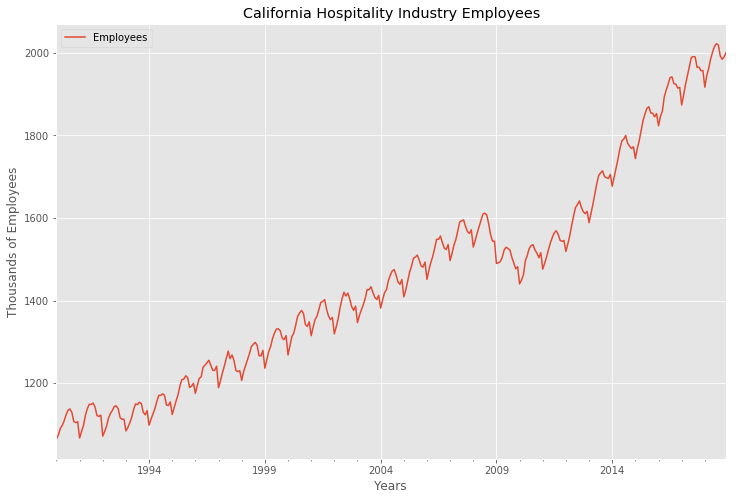

In [0]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Employees'
xlabel = 'Years'

ax = df.plot(figsize = (12, 8), label = True, title = title);
ax.autoscale(axis = 'x', tight = True);
ax.set(xlabel = xlabel, ylabel = ylabel);

## RUN ETS DECOMPOSITION

Using an additive model

In [0]:
# Format plot to enhance ETS graph

from pylab import rcParams

rcParams['figure.figsize'] = 12,8

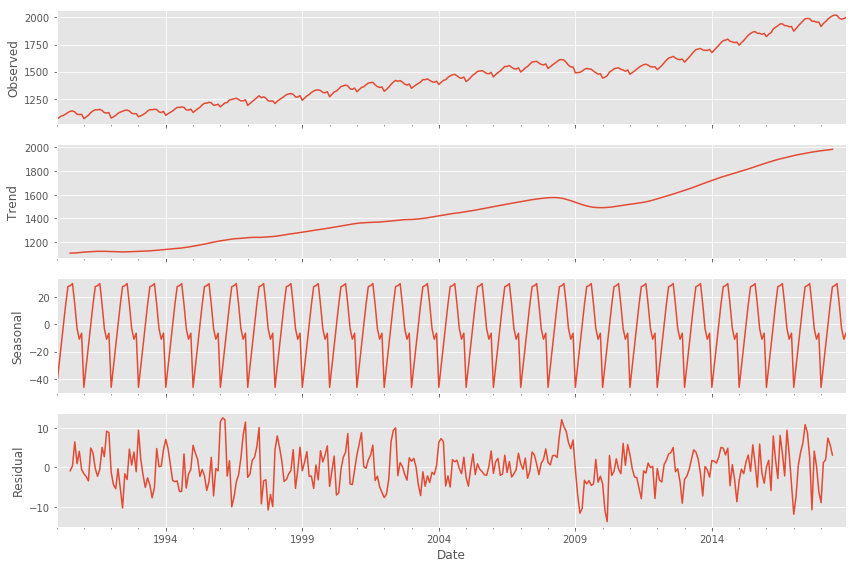

In [0]:
result = seasonal_decompose(df['Employees'], model = 'add')
result.plot();

## Run ```pmdarima.auto_arima``` to Obtain Recommended Orders 

In [0]:
auto_arima(df['Employees'], seasonal = True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1098.307
Date:                            Sun, 21 Jul 2019   AIC                           2210.614
Time:                                    17:29:30   BIC                           2237.559
Sample:                                         0   HQIC                          2221.343
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.081      0.936      -0.010       0.011
ar.L1          0.9222      0.046     20.153      0.000       0.833       1.012
ma.L1         -0.9438      0.071    -13.367      0.000      -1.082      -0.805
ma.L2          0.1316      0.060      2.185      0.029       0.014       0.250
ar.S.L12       0.9977      0.001    722.847      0.000       0.995       1.000
ma.S.L12      -0.7574      0.042    -17.919      0.000      -0.840      -0.675
sigma2        29.1948      1.702     17.157      0.000      25.860      32.530
===================================================================================
Ljung-Box (Q):                       32.12   Jarque-Bera (JB):                66.33
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Split Data into Train, Test, Sets

Select one year (12 records) for testing. 

In [0]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

## Create SARIMA Model
Use order SARIMA(1,1,2)(1,0,1,12) as recommended by ```auto_arima```

In [0]:
model = SARIMAX(train['Employees'], order = (1,1,2), seasonal_order = (1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1058.058
Date:                            Sun, 21 Jul 2019   AIC                           2128.116
Time:                                    17:34:53   BIC                           2151.001
Sample:                                01-01-1990   HQIC                          2137.240
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.238      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.619      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.454      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    730.121      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.160      0.000      -0.838      -0.666
sigma2        28.7642      1.684     17.078      0.000      25.463      32.065
===================================================================================
Ljung-Box (Q):                       29.90   Jarque-Bera (JB):                73.32
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Obtain Predicted Values

In [0]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('SARIMAX(1, 1, 2)x(1, 0, 1, 12) Predictions')

## Plot Predictions Against Known Values

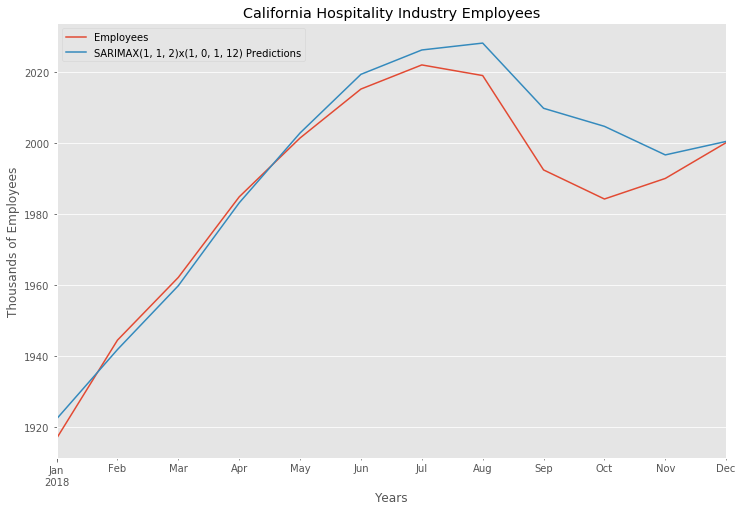

In [0]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Employees'
xlabel = 'Years'

ax = test['Employees'].plot(legend = True, figsize = (12, 8), title = title );
predictions.plot(legend = True)
ax.autoscale(axis = 'x', tight = True);
ax.set(xlabel = xlabel, ylabel = ylabel);


## Evaluate Model Using Mean Squared Error (MSE) & Root Mean Squared Error (RMSE)

In [0]:
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)(1, 0, 1, 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(1, 1, 2)(1, 0, 1, 12) RMSE Error: {error2:11.10}')
      

SARIMAX(1, 1, 2)(1, 0, 1, 12) MSE Error: 77.65505693
SARIMAX(1, 1, 2)(1, 0, 1, 12) RMSE Error: 8.812210672


## Retrain Model and Forecast

Retrain the model using all the original data and forecast one year into the future.

In [0]:

model = SARIMAX(df['Employees'], order = (1,1,2), seasonal_order = (1,0,1,12))
results = model.fit()
forecast = results.predict(len(df), len(df)+11, typ='levels', ).rename('SARIMAX(1, 1, 2)x(1, 0, 1, 12) Predictions')

## Plot Predictions Alongside Historical Data

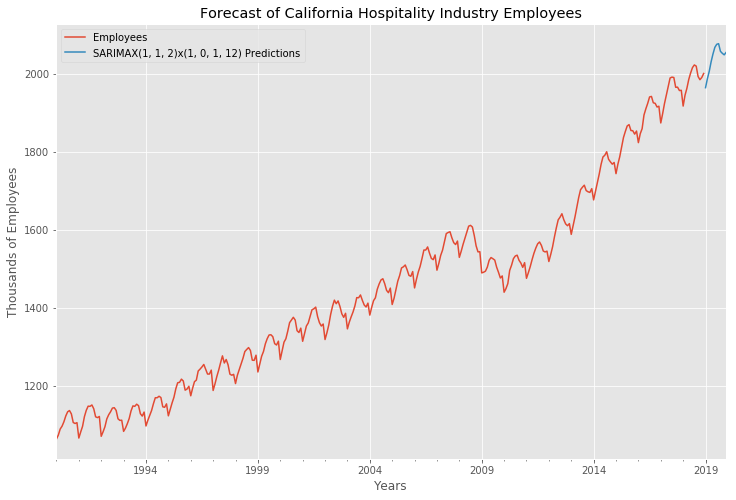

In [0]:
title = 'Forecast of California Hospitality Industry Employees'
ylabel = 'Thousands of Employees'
xlabel = 'Years'

ax = df['Employees'].plot(legend = True, figsize = (12, 8), title = title );
forecast.plot(legend = True)
ax.autoscale(axis = 'x', tight = True);
ax.set(xlabel = xlabel, ylabel = ylabel);
